In [353]:
!pip install pycountry

In [354]:
import pandas as pd
import numpy as np

In [355]:
df = pd.read_excel('liste-des-films-sortis-dans-les-salles-de-cinema-en-france-de-1945-a-2020.xlsx')

In [356]:
df

Titre de l'œuvre              Réalisateur  \
0                               À bout de nerfs            Pierre Seguin   
1                              About love Tokyo       Mitsuo Yanagimachi   
2                                          A ay               Reha Erdem   
3            À bout de course. Running on empty             Sidney Lumet   
4                                      Abandons         Bartolome de San   
...                                         ...                      ...   
87105              Fleurs rouges. Zouhour hamra            Non renseigné   
87106  Filles à embrasser. Koritsia gia filimma       Giannis Dalianidis   
87107                                 Loyalties             Anne Wheeler   
87108                                     Hades  Stelios Haralambopoulos   
87109                La grammaire de grand-mère       Jean-Pierre Bekolo   

                                   Producteur           Nationalité  \
0                             Gem Productions                France   
1                              Seisaku Iinkai                 Japon   
2       Images et Caméras - Métis Productions      Turquie - France   
3                                     Lorimar            États-Unis   
4            Les Productions Philippe Dussart                France   
...                                       ...                   ...   
87105                           Non renseigné                 Liban   
87106                              Finos Film                 Grèce   
87107  Lauron International - Dumbarton Films  Canada - Royaume-Uni   
87108                       Greek Film Center                 Grèce   
87109                          JBA Production                France   

      Date de sortie         Format N° de visa d'exploitation  \
0               1988  Court-métrage                     67623   
1               1993   Long-métrage                     81776   
2               1990   Long-métrage                     71420   
3               1988   Long-métrage                     68657   
4               1984  Court-métrage                     59005   
...              ...            ...                       ...   
87105           1957   Long-métrage             Non renseigné   
87106           1965   Long-métrage             Non renseigné   
87107           1989   Long-métrage             Non renseigné   
87108           1998   Long-métrage             Non renseigné   
87109           1998   Long-métrage             Non renseigné   

      Localisation du dossier de visa d'exploitation  
0                                Archives nationales  
1                                Archives nationales  
2                                Archives nationales  
3                                Archives nationales  
4                                Archives nationales  
...                                              ...  
87105                                            CNC  
87106                                            CNC  
87107                                            CNC  
87108                                            CNC  
87109                                            CNC  

[87110 rows x 8 columns]

In [357]:
for i in df.columns:
    a = 100*len(df[i].dropna())/len(df[i])
    print(i, a)
#Pas besoin de Drop

Titre de l'œuvre 100.0
Réalisateur 99.9977040523476
Producteur 99.9977040523476
Nationalité 100.0
Date de sortie 99.99196418321662
Format 100.0
N° de visa d'exploitation 100.0
Localisation du dossier de visa d'exploitation 100.0


In [358]:
df["Localisation du dossier de visa d'exploitation"].value_counts()

CNC                    49875
Archives nationales    37235
Name: Localisation du dossier de visa d'exploitation, dtype: int64

In [359]:
df['Producteur'].value_counts()

Non renseigné                                                                                                           2589
Paramount Pictures                                                                                                       848
Warner Bros                                                                                                              705
Columbia Pictures                                                                                                        661
20th Century Fox                                                                                                         656
                                                                                                                        ... 
Société du Rio - DD Productions - SEDIF (Societé d'Exploitation et de Distribution de Films) - Greencard Productions       1
Stephan Films - UGC (Union Générale Cinématographique) - Arama Films Productions - Eminent Domain                          1


In [360]:
df['Nationalité'].value_counts()

Non renseigné                   31396
France                          27434
États-Unis                      13470
Italie                           1557
Allemagne                        1154
                                ...  
Israël - France                     1
 Royaume-Uni                        1
 Russie (ex. URSS)                  1
France - Allemagne - Italie         1
Arménie                             1
Name: Nationalité, Length: 783, dtype: int64

In [361]:
df['Format'].value_counts()

Non renseigné         36582
Long-métrage          26252
Court-métrage         24267
Long-métrage              2
États-Unis                1
Long-métrage(1947)        1
1954                      1
France]                   1
-                         1
France-Italie             1
 Long-métrage             1
Name: Format, dtype: int64

In [362]:
df['Format'].fillna('Non renseigné')

0        Court-métrage
1         Long-métrage
2         Long-métrage
3         Long-métrage
4        Court-métrage
             ...      
87105     Long-métrage
87106     Long-métrage
87107     Long-métrage
87108     Long-métrage
87109     Long-métrage
Name: Format, Length: 87110, dtype: object

In [363]:
df['Format'] = df['Format'].replace(1954, 'Court-métrage')

In [364]:
df['Format'] = df['Format'].replace('États-Unis', 'Long-métrage')

In [365]:
df['Format'] = df['Format'].replace('France]', 'Court-métrage')

In [366]:
df['Format'] = df['Format'].replace('France-Italie', 'Long-métrage')

In [367]:
df['Format'] = df['Format'].replace('-', 'Court-métrage')

In [368]:
df.loc[df['Format'].str.contains('Long-métrage', case = False), 'Format'] = 'Long-métrage'

In [369]:
df['Format'].value_counts()

Non renseigné    36582
Long-métrage     26258
Court-métrage    24270
Name: Format, dtype: int64

In [370]:
df["N° de visa d'exploitation"].value_counts()

Non renseigné    2205
897                 4
49304               3
110137              3
29808               3
                 ... 
36260               1
37699               1
37774               1
37864               1
97955               1
Name: N° de visa d'exploitation, Length: 84242, dtype: int64

In [371]:
df[df["N° de visa d'exploitation"] == 897]

Titre de l'œuvre      Réalisateur  \
56715           Les Indes (ex. Sortilège exotique)   Alfred Chaumel   
57747      Extrême orient (ex. Sortilège exotique)   Alfred Chaumel   
63681  Tableaux malgaches (ex. Sortilège exotique)  Henri Beauvais    
64436                           Sortilège exotique  Henri Beauvais    

            Producteur    Nationalité Date de sortie         Format  \
56715      Franfilmdis         France           1946  Court-métrage   
57747      Franfilmdis         France           1949  Court-métrage   
63681     Franfilmdis          France           1950  Court-métrage   
64436  Henri Beauvais   Non renseigné           1945   Long-métrage   

      N° de visa d'exploitation Localisation du dossier de visa d'exploitation  
56715                       897                                            CNC  
57747                       897                                            CNC  
63681                       897                                            CNC  
64436                       897                                            CNC

In [372]:
df[df["N° de visa d'exploitation"] == 'Non renseigné']

Titre de l'œuvre              Réalisateur  \
76874  See you next tuesday (ex. Mona, Mona, Mona)               Drew Tobia   
76893         Le cœur de l'homme. The heart of man                Éric Esau   
84907            Les feux du théâtre. Stage struck             Sidney Lumet   
84908                 Variétés filmées (numéro 24)            Georges Jaffé   
84909                 Variétés filmées (numéro 25)            Georges Jaffé   
...                                            ...                      ...   
87105                 Fleurs rouges. Zouhour hamra            Non renseigné   
87106     Filles à embrasser. Koritsia gia filimma       Giannis Dalianidis   
87107                                    Loyalties             Anne Wheeler   
87108                                        Hades  Stelios Haralambopoulos   
87109                   La grammaire de grand-mère       Jean-Pierre Bekolo   

                                              Producteur  \
76874                                      Non renseigné   
76893                                      Non renseigné   
84907                                 RKO Radio Pictures   
84908  ECIM (Société d'Expansion Cinématographique Ma...   
84909  ECIM (Société d'Expansion Cinématographique Ma...   
...                                                  ...   
87105                                      Non renseigné   
87106                                         Finos Film   
87107             Lauron International - Dumbarton Films   
87108                                  Greek Film Center   
87109                                     JBA Production   

                Nationalité Date de sortie         Format  \
76874            États-Unis           2014   Long-métrage   
76893            États-Unis           2018   Long-métrage   
84907            États-Unis           1983   Long-métrage   
84908                France           1954  Court-métrage   
84909                France           1954  Court-métrage   
...                     ...            ...            ...   
87105                 Liban           1957   Long-métrage   
87106                 Grèce           1965   Long-métrage   
87107  Canada - Royaume-Uni           1989   Long-métrage   
87108                 Grèce           1998   Long-métrage   
87109                France           1998   Long-métrage   

      N° de visa d'exploitation Localisation du dossier de visa d'exploitation  
76874             Non renseigné                                            CNC  
76893             Non renseigné                                            CNC  
84907             Non renseigné                                            CNC  
84908             Non renseigné                                            CNC  
84909             Non renseigné                                            CNC  
...                         ...                                            ...  
87105             Non renseigné                                            CNC  
87106             Non renseigné                                            CNC  
87107             Non renseigné                                            CNC  
87108             Non renseigné                                            CNC  
87109             Non renseigné                                            CNC  

[2205 rows x 8 columns]

In [373]:
df['Date de sortie'].value_counts()

1945             3239
1980             2338
1965             1951
1960             1885
1946             1809
                 ... 
Non renseigné     279
2020               82
1940                1
1930                1
Brésil              1
Name: Date de sortie, Length: 80, dtype: int64

In [374]:
df[df['Date de sortie'] == 'Brésil']

Titre de l'œuvre    Réalisateur  \
53468  Nuits chaudes brésiliennes (ex. Eve au Brésil)...  Pierre Caron    

          Producteur Nationalité Date de sortie         Format  \
53468  Francamerica       Brésil         Brésil  Court-métrage   

      N° de visa d'exploitation Localisation du dossier de visa d'exploitation  
53468                     19142                                            CNC

In [375]:
df['Date de sortie'] = df['Date de sortie'].replace('Brésil', 1968)

In [376]:
res = df.loc[df['Date de sortie'].isna()]

In [377]:
res

Titre de l'œuvre  \
78277                                        Sur le quai   
78417                                   Terceiro Milenio   
79516  Quelque part au Pays basque. Numbait eskualher...   
80174                      On ne badine pas avec l'amour   
82833                                   Le signe du lion   
82944                                  Les trois cousins   
83690                        Le secret de madame Clapain   

                       Réalisateur                     Producteur Nationalité  \
78277                 Robert Cohen                   Banc Public       France   
78417  Bodansky Jorge - Gauer Wolf                     Embrafilme      Brésil   
79516                Pierre Duplaa                  Pierre Duplaa      France   
80174                Jean Desailly  Société Indépendante de Films      France   
82833                  Éric Rohmer                     Ajym Films      France   
82944                 René Vautier                  Reggane Films      France   
83690              Thiriet Maurice              Productions Jason      France   

      Date de sortie         Format N° de visa d'exploitation  \
78277            NaN  Court-métrage                     50008   
78417            NaN   Long-métrage                     57704   
79516            NaN  Court-métrage                     40859   
80174            NaN   Long-métrage                     20834   
82833            NaN   Long-métrage                     22388   
82944            NaN  Court-métrage                     35289   
83690            NaN   Long-métrage                       491   

      Localisation du dossier de visa d'exploitation  
78277                                            CNC  
78417                                            CNC  
79516                                            CNC  
80174                                            CNC  
82833                                            CNC  
82944                                            CNC  
83690                                            CNC

In [378]:
df['Date de sortie'] = df['Date de sortie'].dropna()

In [379]:
df['Date de sortie'].value_counts()

1945             3239
1980             2338
1965             1951
1960             1885
1946             1809
                 ... 
1989              685
Non renseigné     279
2020               82
1940                1
1930                1
Name: Date de sortie, Length: 79, dtype: int64

In [380]:
df

Titre de l'œuvre              Réalisateur  \
0                               À bout de nerfs            Pierre Seguin   
1                              About love Tokyo       Mitsuo Yanagimachi   
2                                          A ay               Reha Erdem   
3            À bout de course. Running on empty             Sidney Lumet   
4                                      Abandons         Bartolome de San   
...                                         ...                      ...   
87105              Fleurs rouges. Zouhour hamra            Non renseigné   
87106  Filles à embrasser. Koritsia gia filimma       Giannis Dalianidis   
87107                                 Loyalties             Anne Wheeler   
87108                                     Hades  Stelios Haralambopoulos   
87109                La grammaire de grand-mère       Jean-Pierre Bekolo   

                                   Producteur           Nationalité  \
0                             Gem Productions                France   
1                              Seisaku Iinkai                 Japon   
2       Images et Caméras - Métis Productions      Turquie - France   
3                                     Lorimar            États-Unis   
4            Les Productions Philippe Dussart                France   
...                                       ...                   ...   
87105                           Non renseigné                 Liban   
87106                              Finos Film                 Grèce   
87107  Lauron International - Dumbarton Films  Canada - Royaume-Uni   
87108                       Greek Film Center                 Grèce   
87109                          JBA Production                France   

      Date de sortie         Format N° de visa d'exploitation  \
0               1988  Court-métrage                     67623   
1               1993   Long-métrage                     81776   
2               1990   Long-métrage                     71420   
3               1988   Long-métrage                     68657   
4               1984  Court-métrage                     59005   
...              ...            ...                       ...   
87105           1957   Long-métrage             Non renseigné   
87106           1965   Long-métrage             Non renseigné   
87107           1989   Long-métrage             Non renseigné   
87108           1998   Long-métrage             Non renseigné   
87109           1998   Long-métrage             Non renseigné   

      Localisation du dossier de visa d'exploitation  
0                                Archives nationales  
1                                Archives nationales  
2                                Archives nationales  
3                                Archives nationales  
4                                Archives nationales  
...                                              ...  
87105                                            CNC  
87106                                            CNC  
87107                                            CNC  
87108                                            CNC  
87109                                            CNC  

[87110 rows x 8 columns]

In [381]:
for i in df['Nationalité']:
    if type(i) != str:
        print(i)

1948


In [382]:
df[df['Nationalité'] == 1948]

Titre de l'œuvre    Réalisateur Producteur  \
40976  Il était un petit navire. Down to the sea  Non renseigné       Coi    

      Nationalité Date de sortie         Format N° de visa d'exploitation  \
40976        1948           1948  Non renseigné                      7985   

      Localisation du dossier de visa d'exploitation  
40976                                            CNC

In [383]:
df['Nationalité'] = df['Nationalité'].replace(1948, 'Royaume-Uni')

In [384]:
df.loc[40976, 'Format'] = 'Court-métrage'

In [385]:
count_film = df.groupby('Date de sortie').size().reset_index(name = 'count film')

In [386]:
count_film

Date de sortie  count film
0            1930           1
1            1940           1
2            1945        3239
3            1946        1809
4            1947        1460
..            ...         ...
74           2017        1242
75           2018        1086
76           2019         743
77           2020          82
78  Non renseigné         279

[79 rows x 2 columns]

In [387]:
import plotly.graph_objects as pgo

plot = pgo.Figure(data = [pgo.Scatter(
	x = count_film['Date de sortie'],
	y = count_film['count film'],
	mode = 'markers')])

plot.update_layout(
	updatemenus = [
        dict(
        	buttons = list([
                dict(
                	args = ['type', 'scatter'],
                	label = 'Scatter plot',
                	method = 'restyle',),
                dict(
                	args = ['type', 'bar'],
                	label = 'Bar plot',
                	method = 'restyle')
            ]),
        	direction = 'down')
    ])

plot.show()

In [388]:
count_film_country = df.groupby('Nationalité').size().reset_index(name = 'count films')

In [389]:
count_film_country

Nationalité  count films
0                           Allemagne             4
1                              Canada             1
2                             Espagne             1
3                               France            2
4                              France             2
..                                 ...          ...
777           États-Unis - Royaume-Uni           22
778  États-Unis - Royaume-Uni - Canada            1
779                États-Unis - Russie            1
780       États-Unis - Russie - Chypre            1
781               États-Unis - Turquie            1

[782 rows x 2 columns]

In [390]:
for i in range(len(count_film_country)):
    a = count_film_country.loc[i, 'Nationalité']
    arr = a.split(" - ")
    count_film_country.loc[i, 'Pays'] = arr[0]

In [391]:
count_film_country

Nationalité  count films         Pays
0                           Allemagne             4   Allemagne 
1                              Canada             1      Canada 
2                             Espagne             1     Espagne 
3                               France            2       France
4                              France             2      France 
..                                 ...          ...          ...
777           États-Unis - Royaume-Uni           22   États-Unis
778  États-Unis - Royaume-Uni - Canada            1   États-Unis
779                États-Unis - Russie            1   États-Unis
780       États-Unis - Russie - Chypre            1   États-Unis
781               États-Unis - Turquie            1   États-Unis

[782 rows x 3 columns]

In [392]:
cfc = count_film_country.groupby('Pays').size().reset_index(name = 'cfc')

In [393]:
cfc

Pays  cfc
0     Allemagne     1
1        Canada     1
2       Espagne     1
3         France    1
4        France     1
..           ...  ...
168       Égypte    5
169      Égypte     1
170    États-Uni    1
171   États-Unis   28
172  États-Unis     1

[173 rows x 2 columns]

In [394]:
cfc['Pays'].value_counts()

 Allemagne         1
Porto-Rico         1
Palestine          1
Panama             1
Paraguay           1
                  ..
France -Italie     1
France -Tunisie    1
Gabon              1
Grèce              1
États-Unis         1
Name: Pays, Length: 173, dtype: int64

In [395]:
cfc['Pays'].unique()

array([' Allemagne ', ' Canada ', ' Espagne ', ' France', ' France ',
       ' Hongrie ', ' Pologne ', ' Royaume-Uni ', ' Russie (ex. URSS) ',
       ' Égypte ', ' États-Unis ', 'Afghanistan', 'Afrique du Sud',
       'Albanie', 'Albanie ', 'Algérie', 'Allemagne', 'Allemagne ',
       'Argentine', 'Arménie', 'Australie', 'Australie ', 'Autriche',
       'Autriche ', 'Belgique', 'Belgique ', 'Bhoutan', 'Bolivie',
       'Bosnie-Herzégovine', 'Brésil', 'Brésil ', 'Bulgarie',
       'Burkina Faso', 'Bénin', 'CM', 'Cambodge', 'Cameroun', 'Canada',
       'Canada ', 'Chili', 'Chine', 'Chine ', 'Colombie', 'Corée du Nord',
       'Corée du Sud', 'Croatie', 'Cuba', 'Danemark', 'Danemark ',
       'Espagne', 'Espagne ', 'Estonie', 'Finlande', 'France', 'France ',
       'France -Allemagne', 'France -Belgique',
       'France -Belgique -Luxembourg', 'France -Bosnie-Herzégovine',
       'France -Italie', 'France -Tunisie', 'Gabon', 'Grèce', 'Grèce ',
       'Guinée', 'Guinée-Bissau', 'Géorgie', 

In [396]:
cfc.loc[cfc['Pays'].str.contains('Allemagne', case = False), 'Pays'] = 'Allemagne'

In [397]:
cfc.loc[cfc['Pays'].str.contains('Canada', case = False), 'Pays'] = 'Canada'

In [398]:
cfc.loc[cfc['Pays'].str.contains('Espagne', case = False), 'Pays'] = 'Espagne'

In [399]:
cfc.loc[cfc['Pays'].str.contains('France', case = False), 'Pays'] = 'France'

In [400]:
cfc.loc[cfc['Pays'].str.contains('Hongrie', case = False), 'Pays'] = 'Hongrie'

In [401]:
cfc.loc[cfc['Pays'].str.contains('Pologne', case = False), 'Pays'] = 'Pologne'

In [402]:
cfc.loc[cfc['Pays'].str.contains('Royaume-Uni', case = False), 'Pays'] = 'Royaume-Uni'

In [403]:
cfc.loc[cfc['Pays'].str.contains('Russie', case = False), 'Pays'] = 'Russie'

In [404]:
cfc.loc[cfc['Pays'].str.contains('Égypte', case = False), 'Pays'] = 'Égypte'

In [405]:
cfc.loc[cfc['Pays'].str.contains('États-Unis', case = False), 'Pays'] = 'États-Unis'

In [406]:
cfc.loc[cfc['Pays'].str.contains('Albanie', case = False), 'Pays'] = 'Albanie'

In [407]:
cfc.loc[cfc['Pays'].str.contains('Australie', case = False), 'Pays'] = 'Australie'

In [408]:
cfc.loc[cfc['Pays'].str.contains('Autriche', case = False), 'Pays'] = 'Autriche'

In [409]:
cfc.loc[cfc['Pays'].str.contains('Belgique', case = False), 'Pays'] = 'Belgique'

In [410]:
cfc.loc[cfc['Pays'].str.contains('Brésil', case = False), 'Pays'] = 'Brésil'

In [411]:
cfc.loc[cfc['Pays'].str.contains('Chine', case = False), 'Pays'] = 'Chine'

In [412]:
cfc.loc[cfc['Pays'].str.contains('Danemark', case = False), 'Pays'] = 'Danemark'

In [413]:
cfc.loc[cfc['Pays'].str.contains('Grèce', case = False), 'Pays'] = 'Grèce'

In [414]:
cfc.loc[cfc['Pays'].str.contains('Hong-Kong', case = False), 'Pays'] = 'Hong-Kong'

In [415]:
cfc.loc[cfc['Pays'].str.contains('Irtalie', case = False), 'Pays'] = 'Italie'

In [416]:
cfc.loc[cfc['Pays'].str.contains('Italie', case = False), 'Pays'] = 'Italie'

In [417]:
cfc.loc[cfc['Pays'].str.contains('Japon', case = False), 'Pays'] = 'Japon'

In [418]:
cfc.loc[cfc['Pays'].str.contains('Lettonie', case = False), 'Pays'] = 'Lettonie'

In [419]:
cfc.loc[cfc['Pays'].str.contains('Mexique', case = False), 'Pays'] = 'Mexique'

In [420]:
cfc.loc[cfc['Pays'].str.contains('Norvège', case = False), 'Pays'] = 'Norvège'

In [421]:
cfc.loc[cfc['Pays'].str.contains('Nouvelle Zélande', case = False), 'Pays'] = 'Nouvelle Zélande'

In [422]:
cfc.loc[cfc['Pays'].str.contains('Nouvelle-Zélande', case = False), 'Pays'] = 'Nouvelle Zélande'

In [423]:
cfc.loc[cfc['Pays'].str.contains('Sri-Lanka', case = False), 'Pays'] = 'Sri Lanka'

In [424]:
cfc.loc[cfc['Pays'].str.contains('Suède', case = False), 'Pays'] = 'Suède'

In [425]:
cfc.loc[cfc['Pays'].str.contains('Sénégal', case = False), 'Pays'] = 'Sénégal'

In [426]:
cfc.loc[cfc['Pays'].str.contains('Tchécoslovaquie', case = False), 'Pays'] = 'Tchécoslovaquie'

In [427]:
cfc.loc[cfc['Pays'].str.contains('Tchécoslovaque', case = False), 'Pays'] = 'Tchécoslovaquie'

In [428]:
cfc.loc[cfc['Pays'].str.contains('Ukraine', case = False), 'Pays'] = 'Ukraine'

In [429]:
cfc.loc[cfc['Pays'].str.contains('Viêt Nam', case = False), 'Pays'] = 'Viêt Nam'

In [430]:
cfc.loc[cfc['Pays'].str.contains('Vietnam', case = False), 'Pays'] = 'Viêt Nam'

In [431]:
cfc.loc[cfc['Pays'].str.contains('Yougoslavie', case = False), 'Pays'] = 'Yougoslavie'

In [432]:
cfc.loc[cfc['Pays'].str.contains('États-Uni', case = False), 'Pays'] = 'États-Unis'

In [433]:
cfc['Pays'].unique()

array(['Allemagne', 'Canada', 'Espagne', 'France', 'Hongrie', 'Pologne',
       'Royaume-Uni', 'Russie', 'Égypte', 'États-Unis', 'Afghanistan',
       'Afrique du Sud', 'Albanie', 'Algérie', 'Argentine', 'Arménie',
       'Australie', 'Autriche', 'Belgique', 'Bhoutan', 'Bolivie',
       'Bosnie-Herzégovine', 'Brésil', 'Bulgarie', 'Burkina Faso',
       'Bénin', 'CM', 'Cambodge', 'Cameroun', 'Chili', 'Chine',
       'Colombie', 'Corée du Nord', 'Corée du Sud', 'Croatie', 'Cuba',
       'Danemark', 'Estonie', 'Finlande', 'Gabon', 'Grèce', 'Guinée',
       'Guinée-Bissau', 'Géorgie', 'Hong Kong', 'Hong Kong ', 'Inde',
       'Indonésie', 'Iran', 'Irlande', 'Italie', 'Islande', 'Israël',
       'Israël ', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan',
       'Lettonie', 'Liban', 'Liban ', 'Libye', 'Lituanie', 'Luxembourg',
       'Macédoine', 'Malaisie', 'Mali', 'Maroc', 'Mexique', 'Moldavie',
       'Monaco', 'Mongolie', 'Mozambique', 'New Regency Productions',
       'Non renseigné', 'No

In [434]:
import pycountry

def get_country_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None

cfc['CodePays'] = cfc['Pays'].apply(get_country_code)

In [435]:
cfc

Pays  cfc CodePays
0     Allemagne    1     None
1        Canada    1      CAN
2       Espagne    1     None
3        France    1      FRA
4        France    1      FRA
..          ...  ...      ...
168      Égypte    5     None
169      Égypte    1     None
170  États-Unis    1     None
171  États-Unis   28     None
172  États-Unis    1     None

[173 rows x 3 columns]

In [436]:
pays_en_anglais = [
    'Germany', 'Canada', 'Spain', 'France', 'Hungary', 'Poland',
    'United Kingdom', 'Russia', 'Egypt', 'United States', 'Afghanistan',
    'South Africa', 'Albania', 'Algeria', 'Argentina', 'Armenia',
    'Australia', 'Austria', 'Belgium', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
    'Benin', 'Cameroon', 'Cambodia', 'Cameroon', 'Chile', 'China',
    'Colombia', 'North Korea', 'South Korea', 'Croatia', 'Cuba',
    'Denmark', 'Estonia', 'Finland', 'Gabon', 'Greece', 'Guinea',
    'Guinea-Bissau', 'Georgia', 'Hong Kong', 'Hong Kong', 'India',
    'Indonesia', 'Iran', 'Ireland', 'Italy', 'Iceland', 'Israel',
    'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Latvia',
    'Lebanon', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg',
    'Macedonia', 'Malaysia', 'Mali', 'Morocco', 'Mexico', 'Moldova',
    'Monaco', 'Mongolia', 'Mozambique', 'New Regency Productions',
    'Unknown', 'Norway', 'New Zealand', 'Palestine', 'Panama', 'Paraguay',
    'Netherlands', 'Mark Peploe', 'Philippines', 'Porto Rico', 'Portugal',
    'Peru', 'Red Star Cinema', 'Rhodesia', 'Romania',
    'Dominican Republic', "People's Republic of Angola", 'Czech Republic',
    'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'Sri Lanka', 'Switzerland',
    'Switzerland', 'Sweden', 'Syria', 'Senegal', 'Taiwan',
    'Czechoslovakia', 'Thailand', 'Togo', 'Tunisia', 'Turkey',
    'Ukraine', 'Uruguay', 'Vatican', 'Venezuela', 'Vietnam', 'Yugoslavia'
]


In [437]:
list_corr = cfc['Pays'].unique()

In [438]:
dico_corr = {}

In [439]:
len(list_corr)

114

In [440]:
len(pays_en_anglais)

114

In [441]:
for i in range(114):
    dico_corr[list_corr[i]] = pays_en_anglais[i]

In [442]:
cfc['Country'] = cfc['Pays'].map(dico_corr)

In [443]:
cfc

Pays  cfc CodePays        Country
0     Allemagne    1     None        Germany
1        Canada    1      CAN         Canada
2       Espagne    1     None          Spain
3        France    1      FRA         France
4        France    1      FRA         France
..          ...  ...      ...            ...
168      Égypte    5     None          Egypt
169      Égypte    1     None          Egypt
170  États-Unis    1     None  United States
171  États-Unis   28     None  United States
172  États-Unis    1     None  United States

[173 rows x 4 columns]

In [444]:
import pycountry

def get_country_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None

cfc['CodePays'] = cfc['Country'].apply(get_country_code)

In [445]:
cfc

Pays  cfc CodePays        Country
0     Allemagne    1      DEU        Germany
1        Canada    1      CAN         Canada
2       Espagne    1      ESP          Spain
3        France    1      FRA         France
4        France    1      FRA         France
..          ...  ...      ...            ...
168      Égypte    5      EGY          Egypt
169      Égypte    1      EGY          Egypt
170  États-Unis    1      USA  United States
171  États-Unis   28      USA  United States
172  États-Unis    1      USA  United States

[173 rows x 4 columns]

In [446]:
list_cp = [cfc['CodePays']]
list_cp

[0      DEU
 1      CAN
 2      ESP
 3      FRA
 4      FRA
       ... 
 168    EGY
 169    EGY
 170    USA
 171    USA
 172    USA
 Name: CodePays, Length: 173, dtype: object]

In [447]:
import plotly.express as px

fig = px.scatter_geo(cfc, locations="CodePays", color="Pays",
                     hover_name="Pays", size="cfc",
                     projection="natural earth")
fig.show()

In [448]:
df

Titre de l'œuvre              Réalisateur  \
0                               À bout de nerfs            Pierre Seguin   
1                              About love Tokyo       Mitsuo Yanagimachi   
2                                          A ay               Reha Erdem   
3            À bout de course. Running on empty             Sidney Lumet   
4                                      Abandons         Bartolome de San   
...                                         ...                      ...   
87105              Fleurs rouges. Zouhour hamra            Non renseigné   
87106  Filles à embrasser. Koritsia gia filimma       Giannis Dalianidis   
87107                                 Loyalties             Anne Wheeler   
87108                                     Hades  Stelios Haralambopoulos   
87109                La grammaire de grand-mère       Jean-Pierre Bekolo   

                                   Producteur           Nationalité  \
0                             Gem Productions                France   
1                              Seisaku Iinkai                 Japon   
2       Images et Caméras - Métis Productions      Turquie - France   
3                                     Lorimar            États-Unis   
4            Les Productions Philippe Dussart                France   
...                                       ...                   ...   
87105                           Non renseigné                 Liban   
87106                              Finos Film                 Grèce   
87107  Lauron International - Dumbarton Films  Canada - Royaume-Uni   
87108                       Greek Film Center                 Grèce   
87109                          JBA Production                France   

      Date de sortie         Format N° de visa d'exploitation  \
0               1988  Court-métrage                     67623   
1               1993   Long-métrage                     81776   
2               1990   Long-métrage                     71420   
3               1988   Long-métrage                     68657   
4               1984  Court-métrage                     59005   
...              ...            ...                       ...   
87105           1957   Long-métrage             Non renseigné   
87106           1965   Long-métrage             Non renseigné   
87107           1989   Long-métrage             Non renseigné   
87108           1998   Long-métrage             Non renseigné   
87109           1998   Long-métrage             Non renseigné   

      Localisation du dossier de visa d'exploitation  
0                                Archives nationales  
1                                Archives nationales  
2                                Archives nationales  
3                                Archives nationales  
4                                Archives nationales  
...                                              ...  
87105                                            CNC  
87106                                            CNC  
87107                                            CNC  
87108                                            CNC  
87109                                            CNC  

[87110 rows x 8 columns]

In [449]:
df["Localisation du dossier de visa d'exploitation"].unique()

array(['Archives nationales', 'CNC'], dtype=object)

In [450]:
df['Date de sortie'].unique()

array([1988, 1993, 1990, 1984, 1983, 1979, 1970, 1965, 1960, 1954, 1953,
       1949, 1948, 1947, 1946, 1998, 1996, 1994, 1995, 1992, 1991, 1989,
       1985, 1980, 1975, 1972, 1961, 1962, 1958, 1956, 1955, 1945, 1986,
       1973, 1974, 1971, 1963, 1959, 1957, 1952, 1950, 2000, 2002, 1999,
       1997, 2005, 1951, 1969, 1968, 1967, 2003, 2004, 1987, 2006, 1966,
       1964, 1982, 1981, 1978, 1977, 1976, 2001, 2007, 2008, 2011, 2009,
       1940, 2010, 2012, 2013, 1930, 2016, 2015, 2014, 2017, 2018, 2019,
       2020, nan, 'Non renseigné'], dtype=object)

In [451]:
df['Date de sortie'] = df['Date de sortie'].replace('Non renseigné', 0)

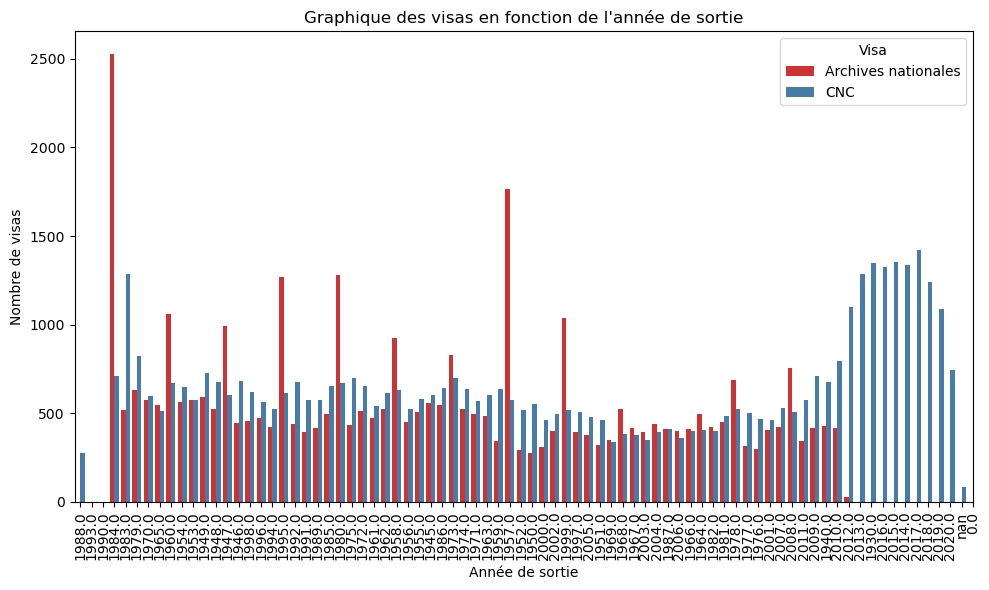

In [452]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous avez un DataFrame nommé "df" avec les colonnes "Date de sortie" (contenant uniquement des années) et "visa".
# Assurez-vous d'importer vos données correctement dans le DataFrame.

# Exemple de DataFrame :
# df = pd.DataFrame({'Date de sortie': [2020, 2021, 2022, 2020, 2021, 2022],
#                    'visa': ['CNC', 'archive', 'CNC', 'CNC', 'archive', 'archive']})

df2 = df.sort_values(by='Date de sortie')
# Créer le graphique avec Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Date de sortie', hue="Localisation du dossier de visa d'exploitation", data=df, palette='Set1')

plt.xlabel('Année de sortie')
plt.ylabel('Nombre de visas')
plt.title('Graphique des visas en fonction de l\'année de sortie')

new_xticks = [str(year) for year in df['Date de sortie'].unique()]
ax.set_xticks(range(len(new_xticks)))
ax.set_xticklabels(new_xticks)

# Afficher le graphique
plt.legend(title='Visa', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [453]:
df['Format'].unique()

array(['Court-métrage', 'Long-métrage', 'Non renseigné'], dtype=object)

In [454]:
df['Format'].value_counts()

Non renseigné    36581
Long-métrage     26258
Court-métrage    24271
Name: Format, dtype: int64

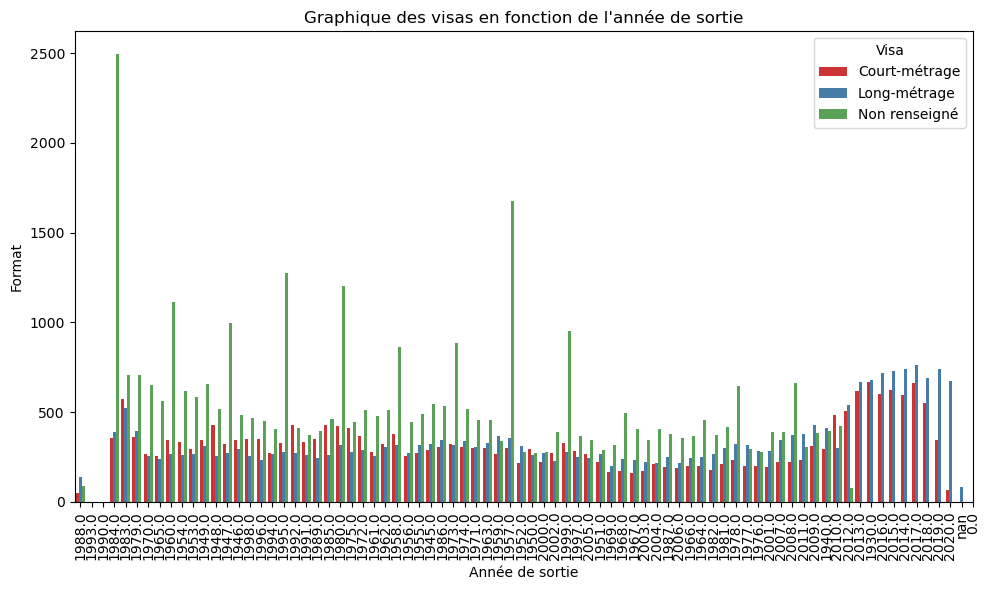

In [455]:
df2 = df.sort_values(by='Date de sortie')
# Créer le graphique avec Seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Date de sortie', hue="Format", data=df, palette='Set1')

plt.xlabel('Année de sortie')
plt.ylabel('Format')
plt.title('Graphique des visas en fonction de l\'année de sortie')

new_xticks = [str(year) for year in df['Date de sortie'].unique()]
ax.set_xticks(range(len(new_xticks)))
ax.set_xticklabels(new_xticks)

# Afficher le graphique
plt.legend(title='Visa', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [456]:
format_pays = df.groupby(['Nationalité', 'Format']).size().reset_index(name = 'count') 

In [457]:
format_pays

Nationalité         Format  count
0                            Allemagne   Non renseigné      4
1                               Canada   Non renseigné      1
2                              Espagne   Non renseigné      1
3                                France  Non renseigné      2
4                               France   Non renseigné      2
...                                 ...            ...    ...
1012           États-Unis - Royaume-Uni  Non renseigné      1
1013  États-Unis - Royaume-Uni - Canada   Long-métrage      1
1014                États-Unis - Russie   Long-métrage      1
1015       États-Unis - Russie - Chypre   Long-métrage      1
1016               États-Unis - Turquie   Long-métrage      1

[1017 rows x 3 columns]

In [458]:
for i in range(len(format_pays)):
    a = format_pays.loc[i, 'Nationalité']
    arr = a.split(" - ")
    format_pays.loc[i, 'Pays'] = arr[0]

In [459]:
format_pays

Nationalité         Format  count         Pays
0                            Allemagne   Non renseigné      4   Allemagne 
1                               Canada   Non renseigné      1      Canada 
2                              Espagne   Non renseigné      1     Espagne 
3                                France  Non renseigné      2       France
4                               France   Non renseigné      2      France 
...                                 ...            ...    ...          ...
1012           États-Unis - Royaume-Uni  Non renseigné      1   États-Unis
1013  États-Unis - Royaume-Uni - Canada   Long-métrage      1   États-Unis
1014                États-Unis - Russie   Long-métrage      1   États-Unis
1015       États-Unis - Russie - Chypre   Long-métrage      1   États-Unis
1016               États-Unis - Turquie   Long-métrage      1   États-Unis

[1017 rows x 4 columns]

In [460]:
format_pays['Pays'].unique()

array([' Allemagne ', ' Canada ', ' Espagne ', ' France', ' France ',
       ' Hongrie ', ' Pologne ', ' Royaume-Uni ', ' Russie (ex. URSS) ',
       ' Égypte ', ' États-Unis ', 'Afghanistan', 'Afrique du Sud',
       'Albanie', 'Albanie ', 'Algérie', 'Allemagne', 'Allemagne ',
       'Argentine', 'Arménie', 'Australie', 'Australie ', 'Autriche',
       'Autriche ', 'Belgique', 'Belgique ', 'Bhoutan', 'Bolivie',
       'Bosnie-Herzégovine', 'Brésil', 'Brésil ', 'Bulgarie',
       'Burkina Faso', 'Bénin', 'CM', 'Cambodge', 'Cameroun', 'Canada',
       'Canada ', 'Chili', 'Chine', 'Chine ', 'Colombie', 'Corée du Nord',
       'Corée du Sud', 'Croatie', 'Cuba', 'Danemark', 'Danemark ',
       'Espagne', 'Espagne ', 'Estonie', 'Finlande', 'France', 'France ',
       'France -Allemagne', 'France -Belgique',
       'France -Belgique -Luxembourg', 'France -Bosnie-Herzégovine',
       'France -Italie', 'France -Tunisie', 'Gabon', 'Grèce', 'Grèce ',
       'Guinée', 'Guinée-Bissau', 'Géorgie', 

In [461]:
format_pays.loc[format_pays['Pays'].str.contains('Allemagne', case = False), 'Pays'] = 'Allemagne'
format_pays.loc[format_pays['Pays'].str.contains('Canada', case = False), 'Pays'] = 'Canada'
format_pays.loc[format_pays['Pays'].str.contains('Espagne', case = False), 'Pays'] = 'Espagne'
format_pays.loc[format_pays['Pays'].str.contains('France', case = False), 'Pays'] = 'France'
format_pays.loc[format_pays['Pays'].str.contains('Hongrie', case = False), 'Pays'] = 'Hongrie'
format_pays.loc[format_pays['Pays'].str.contains('Pologne', case = False), 'Pays'] = 'Pologne'
format_pays.loc[format_pays['Pays'].str.contains('Royaume-Uni', case = False), 'Pays'] = 'Royaume-Uni'
format_pays.loc[format_pays['Pays'].str.contains('Russie', case = False), 'Pays'] = 'Russie'
format_pays.loc[format_pays['Pays'].str.contains('Égypte', case = False), 'Pays'] = 'Égypte'
format_pays.loc[format_pays['Pays'].str.contains('États-Unis', case = False), 'Pays'] = 'États-Unis'
format_pays.loc[format_pays['Pays'].str.contains('Albanie', case = False), 'Pays'] = 'Albanie'
format_pays.loc[format_pays['Pays'].str.contains('Allemagne', case = False), 'Pays'] = 'Allemagne'
format_pays.loc[format_pays['Pays'].str.contains('Australie', case = False), 'Pays'] = 'Australie'
format_pays.loc[format_pays['Pays'].str.contains('Belgique', case = False), 'Pays'] = 'Belgique'
format_pays.loc[format_pays['Pays'].str.contains('Brésil', case = False), 'Pays'] = 'Brésil'
format_pays.loc[format_pays['Pays'].str.contains('Chine', case = False), 'Pays'] = 'Chine'
format_pays.loc[format_pays['Pays'].str.contains('Danemark', case = False), 'Pays'] = 'Danemark'
format_pays.loc[format_pays['Pays'].str.contains('Grèce', case = False), 'Pays'] = 'Grèce'
format_pays.loc[format_pays['Pays'].str.contains('Irtalie', case = False), 'Pays'] = 'Italie'
format_pays.loc[format_pays['Pays'].str.contains('Italie', case = False), 'Pays'] = 'Italie'
format_pays.loc[format_pays['Pays'].str.contains('Japon', case = False), 'Pays'] = 'Japon'
format_pays.loc[format_pays['Pays'].str.contains('Lettonie', case = False), 'Pays'] = 'Lettonie'
format_pays.loc[format_pays['Pays'].str.contains('Liban', case = False), 'Pays'] = 'Liban'
format_pays.loc[format_pays['Pays'].str.contains('Mexique', case = False), 'Pays'] = 'Mexique'
format_pays.loc[format_pays['Pays'].str.contains('Norvège', case = False), 'Pays'] = 'Norvège'
format_pays.loc[format_pays['Pays'].str.contains('Nouvelle Zélande', case = False), 'Pays'] = 'Nouvelle Zélande'
format_pays.loc[format_pays['Pays'].str.contains('Nouvelle-Zélande', case = False), 'Pays'] = 'Nouvelle Zélande'
format_pays.loc[format_pays['Pays'].str.contains('Sri Lanka', case = False), 'Pays'] = 'Sri Lanka'
format_pays.loc[format_pays['Pays'].str.contains('Sri-Lanka', case = False), 'Pays'] = 'Sri Lanka'
format_pays.loc[format_pays['Pays'].str.contains('Suisse', case = False), 'Pays'] = 'Suisse'
format_pays.loc[format_pays['Pays'].str.contains('Suède', case = False), 'Pays'] = 'Suède'
format_pays.loc[format_pays['Pays'].str.contains('Sénégal', case = False), 'Pays'] = 'Sénégal'
format_pays.loc[format_pays['Pays'].str.contains('Tchécoslovaquie', case = False), 'Pays'] = 'Tchécoslovaquie'
format_pays.loc[format_pays['Pays'].str.contains('Ukraine', case = False), 'Pays'] = 'Ukraine'
format_pays.loc[format_pays['Pays'].str.contains('Vietnam', case = False), 'Pays'] = 'Viêt Nam'
format_pays.loc[format_pays['Pays'].str.contains('Viêt Nam', case = False), 'Pays'] = 'Viêt Nam'
format_pays.loc[format_pays['Pays'].str.contains('Yougoslavie', case = False), 'Pays'] = 'Yougoslavie'
format_pays.loc[format_pays['Pays'].str.contains('États-Uni', case = False), 'Pays'] = 'États-Unis'

In [462]:
list_pays = format_pays['Pays'].unique()

In [463]:
list_pays

array(['Allemagne', 'Canada', 'Espagne', 'France', 'Hongrie', 'Pologne',
       'Royaume-Uni', 'Russie', 'Égypte', 'États-Unis', 'Afghanistan',
       'Afrique du Sud', 'Albanie', 'Algérie', 'Argentine', 'Arménie',
       'Australie', 'Autriche', 'Autriche ', 'Belgique', 'Bhoutan',
       'Bolivie', 'Bosnie-Herzégovine', 'Brésil', 'Bulgarie',
       'Burkina Faso', 'Bénin', 'CM', 'Cambodge', 'Cameroun', 'Chili',
       'Chine', 'Colombie', 'Corée du Nord', 'Corée du Sud', 'Croatie',
       'Cuba', 'Danemark', 'Estonie', 'Finlande', 'Gabon', 'Grèce',
       'Guinée', 'Guinée-Bissau', 'Géorgie', 'Hong Kong', 'Hong Kong ',
       'Inde', 'Indonésie', 'Iran', 'Irlande', 'Italie', 'Islande',
       'Israël', 'Israël ', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan',
       'Lettonie', 'Liban', 'Libye', 'Lituanie', 'Luxembourg',
       'Macédoine', 'Malaisie', 'Mali', 'Maroc', 'Mexique', 'Moldavie',
       'Monaco', 'Mongolie', 'Mozambique', 'New Regency Productions',
       'Non renseigné', 

In [464]:
len(list_pays)

114

In [465]:
pays_en_anglais = [
    'Germany', 'Canada', 'Spain', 'France', 'Hungary', 'Poland', 'United Kingdom', 'Russia', 'Egypt', 'United States', 
    'Afghanistan', 'South Africa', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium', 'Bhutan', 
    'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Benin', 'Cambodia', 'Cameroon', 'Chile', 
    'China', 'Colombia', 'North Korea', 'South Korea', 'Croatia', 'Cuba', 'Denmark', 'Estonia', 'Finland', 'Gabon', 
    'Greece', 'Guinea', 'Guinea-Bissau', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Ireland', 'Italy', 'Iceland', 
    'Israel', 'Israel', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 
    'Macedonia', 'Malaysia', 'Mali', 'Morocco', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Mozambique', 'New Regency Productions', 
    'Not specified', 'Norway', 'New Zealand', 'Palestine', 'Panama', 'Paraguay', 'Netherlands', 'Peploe Mark', 'Philippines', 
    'Puerto Rico', 'Portugal', 'Peru', 'Red Star Cinema', 'Rhodesia', 'Romania', 'Dominican Republic', 
    "People's Republic of Angola", 'Czech Republic', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'Sri Lanka', 'Switzerland', 
    'Sweden', 'Syria', 'Senegal', 'Taiwan', 'Czechoslovakia', 'Thailand', 'Togo', 'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 
    'Vatican', 'Venezuela', 'Vietnam', 'Yugoslavia'
]


In [466]:
len(pays_en_anglais)

110

In [467]:
dico_corr = {}

In [468]:
format_pays

Nationalité         Format  count        Pays
0                            Allemagne   Non renseigné      4   Allemagne
1                               Canada   Non renseigné      1      Canada
2                              Espagne   Non renseigné      1     Espagne
3                                France  Non renseigné      2      France
4                               France   Non renseigné      2      France
...                                 ...            ...    ...         ...
1012           États-Unis - Royaume-Uni  Non renseigné      1  États-Unis
1013  États-Unis - Royaume-Uni - Canada   Long-métrage      1  États-Unis
1014                États-Unis - Russie   Long-métrage      1  États-Unis
1015       États-Unis - Russie - Chypre   Long-métrage      1  États-Unis
1016               États-Unis - Turquie   Long-métrage      1  États-Unis

[1017 rows x 4 columns]

In [469]:
format_pays['Country'].unique()

KeyError: 'Country'

In [ ]:
for i in range(len(format_pays)):
    for j in range(len(cfc)):
        if format_pays.loc[i, 'Pays'] == cfc.loc[j, 'Pays']:
            format_pays.loc[i, 'Country'] = cfc.loc[j, 'Country']
            format_pays.loc[i, 'CodePays'] = cfc.loc[j, 'CodePays']

In [ ]:
format_pays

In [ ]:
import plotly.express as px

fig = px.scatter_geo(format_pays, locations="CodePays", color="Pays",
                     hover_name="Pays", size="count",
                     projection="natural earth")
fig.show()